# TKT4108 - Structural Dynamics 2
## Homework 4 - Solution

### Part A Consider the structure shown below with two DOF and the following properties 
**$m_1 = 10^6\ kg \ ,\ m_2 = 10^6\  kg$  
$k_1 = 2x10^7 N/m \ ,\ k_2 = 3x10^7 N/m$**

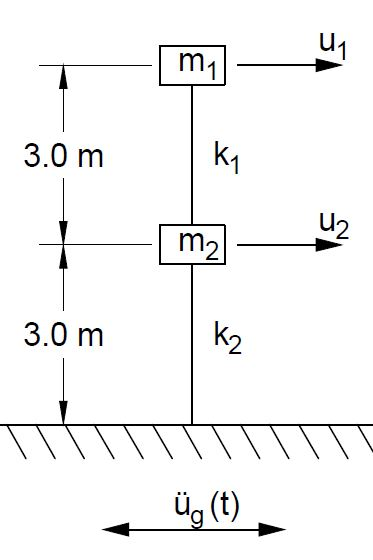

**Assume that the two modes of the structure are:**
$$\phi_1 = \begin{bmatrix} 1.0  \\  0.5  \end{bmatrix}\ ,\ \phi_2 = \begin{bmatrix} 1.0  \\  -1.5  \end{bmatrix}$$
**1) Compute the natural frequencies and periods of the two modes.**  
**2) If the structure is standing on a foundation with horizontal stiffness $k_h = 2×10^7 N/m$, estimate the first natural period of the system by accounting for soil-structure interaction.**

In [1]:
import numpy as np

import scipy.linalg as linalg
import matplotlib.pyplot as plt

# Building Properties
m = 1e+6        # storey mass in kg
k_1 = 2e+7      # DOF1 stifness
k_2 = 3e+7      # DOF1 stifness
L = 3.00        # height difference between storeys
phi = np.array([[1,1],[0.5,-1.5]])  # Assumed modes

# Foundation properties
k_h = 2e+7      # foundation horizontal stifness in N/m

### Part A1
The system stiffness and mass matrices are assembled and the first natural frequency an period are obtained via Rayleigh Quotient (see Chopra section 8.5.3)

In [2]:
# System Matices
K = np.array([[k_1,-k_1],[-k_1,k_2+k_1]])   # stifnees matrix
M = m*np.eye(2)                             # mass matrix

# Rayleigh quotient and natural periods
wn_ray = np.diag(np.sqrt((phi.T @ K @phi)/(phi.T @ M @phi)))    # See Chopra Section 8.5.3
Tn_ray = 2*np.pi/wn_ray

print('The natural circular frequencies are')
print(str(np.around(wn_ray,2)) + ' rad/s')
print( )
print('Then, the natural periods are')
print(str(np.around(Tn_ray,3)) + ' s')
print( )

The natural circular frequencies are
[3.16 7.7 ] rad/s

Then, the natural periods are
[1.987 0.816] s



### Part A2
To consider a foundation idealized as a spring, the period of rigid body motion (RBM) of the structure is computed and then combined with the fundamental one obtained in the previous step

In [3]:
# RBM considering horizontal foundational spring
wn_h = np.sqrt(k_h/np.sum(M))   # natural circular frequency of horizontal displacement mode
Tn_h = 2*np.pi/wn_h

# Natural period of the system considering soil-structure interaction
T_ssi = np.sqrt(Tn_ray**2 + Tn_h**2)

print('The RBM period for the horizontal spring is')
print(str(np.around(Tn_h,3)) + ' s')
print( )
print('Then, the natural period of the system considering soil-structure interaction is')
print(str(np.around(T_ssi[0],3)) + ' s')
print( )

The RBM period for the horizontal spring is
1.987 s

Then, the natural period of the system considering soil-structure interaction is
2.81 s



### Part B: Consider the simple structure in the figure below which consists of a mass $m$ on a beam with lateral stiffness $k$ and length $h$. The structure is standing on a rocking spring with stiffness $k_r$

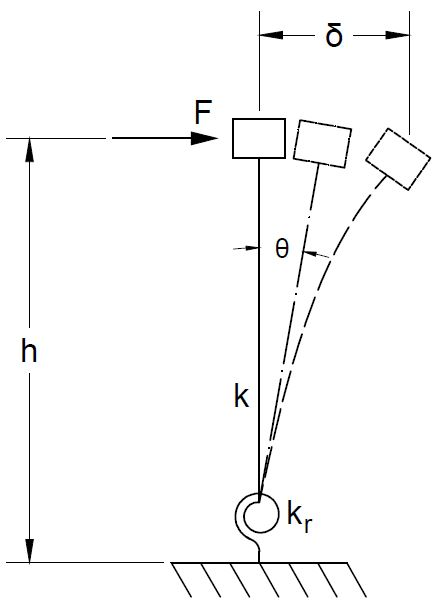

**Show that the natural frequency of the system, $\omega_{e}$, is equal to:
$$\frac{1}{\omega_{e}^{2}} = \frac{1}{\omega_{0}^{2}} +\frac{1}{\omega_{r}^{2}}$$
where $\omega_{0}$ is the natural frequency of the structure (without rocking spring) and $\omega_{r}$ is the natural frequency of system when structure is assumed rigid.**

The total displacement $\delta$ is the sum of the contribution from (1) the elastic deformation of the structure $\delta_{k}$ and (2) the rigid body rotation $\theta$ multiplied by the lever arm $h$.
$$\delta = \delta_{k} + \theta h$$
$$\delta = \frac{F}{k} + \frac{F\ h}{k_r} h$$
If the load is set to be unitary:
$$\delta = \frac{1}{k} + \frac{h^2}{k_r}$$
The stiffness of the system can then be defined as the inverse of the total displacement:
$$K = \delta^{-1}=\frac{1}{\frac{1}{k} + \frac{h^2}{k_r}} \tag{1}$$
Also:
$$K = m\ \omega_{e}^{2} \tag{2}$$
Equating (1) and (2):
$$\frac{1}{\frac{1}{k} + \frac{h^2}{k_r}} = m\ \omega_{e}^{2}= m \left( \frac{1}{k} + \frac{h^2}{k_r} \right)$$
$$\frac{1}{\omega_{e}^{2}} = \frac{m}{k} + \frac{mh^2}{k_r} = \frac{1}{\frac{k}{m}} + \frac{1}{\frac{k_r}{m h^2}}$$
Since:
$$\omega_{0}^{2} = \frac{k}{m}\ ,\ \omega_{r}^{2} = \frac{k_r}{m h^2}$$
Then:
### $$\frac{1}{\omega_{e}^{2}} = \frac{1}{\omega_{0}^{2}} +\frac{1}{\omega_{r}^{2}}$$